In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
fil = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
fr = pd.read_csv('Fraud_check.csv')

In [4]:
fr.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [5]:
fr.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fr.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fr[fr.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [8]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
def split(num):
    if num <= 30000:
        return "Risky"
    else:
        return "Good"
fr.Taxable_Income = fr['Taxable.Income'].apply(split)

<ipython-input-11-b1dda935a631>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  fr.Taxable_Income = fr['Taxable.Income'].apply(split)


# Visualization

<ipython-input-13-c4c2c821e062>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fr[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)


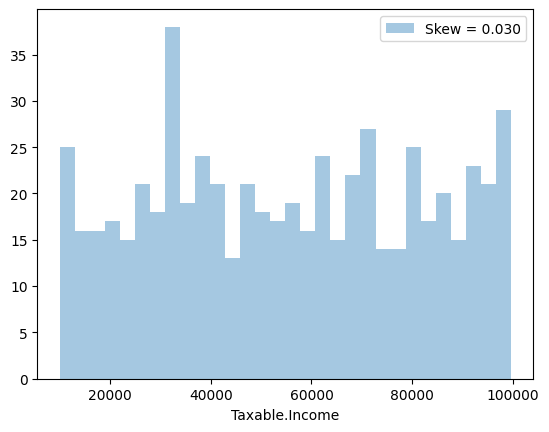

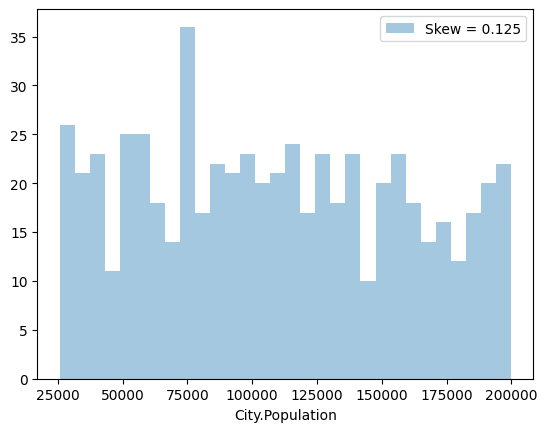

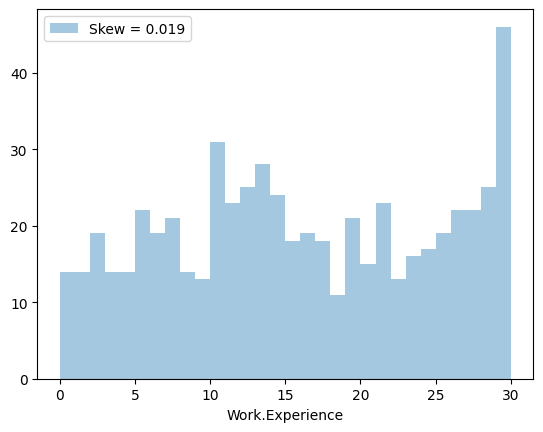

In [13]:
numerical_features=[feature for feature in fr.columns if fr[feature].dtypes != 'O']
for feat in numerical_features:
    skew = fr[feat].skew()
    sns.distplot(fr[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [18]:
fr.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income',
             'City.Population':'City_Population','Work.Experience':'Work_Experience'}, axis = 1, inplace = True)

In [19]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
fr.Undergrad = l.fit_transform(fr.Undergrad)
fr.Marital_Status = l.fit_transform(fr.Marital_Status)
fr.Urban = l.fit_transform(fr.Urban)
fr.Taxable_Income = l.fit_transform(fr.Taxable_Income)

In [20]:
fr.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


<ipython-input-21-96d3cfaec229>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City_Population',data=ot,palette='crest',ax=axes[1])
<ipython-input-21-96d3cfaec229>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Work_Experience',data=ot,palette='crest',ax=axes[2])


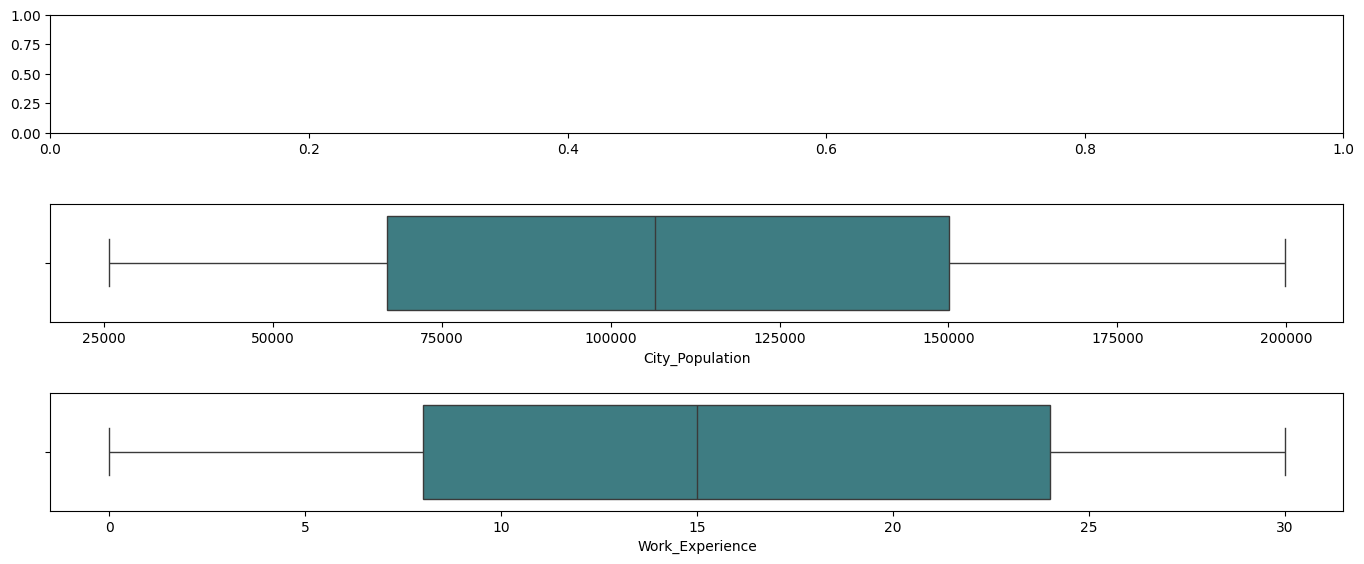

In [21]:
ot=fr.copy()
fig, axes=plt.subplots(3,1,figsize=(14,6),sharex=False,sharey=False)
sns.boxplot(x='City_Population',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Work_Experience',data=ot,palette='crest',ax=axes[2])
plt.tight_layout(pad=2.0)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

<Figure size 800x800 with 0 Axes>

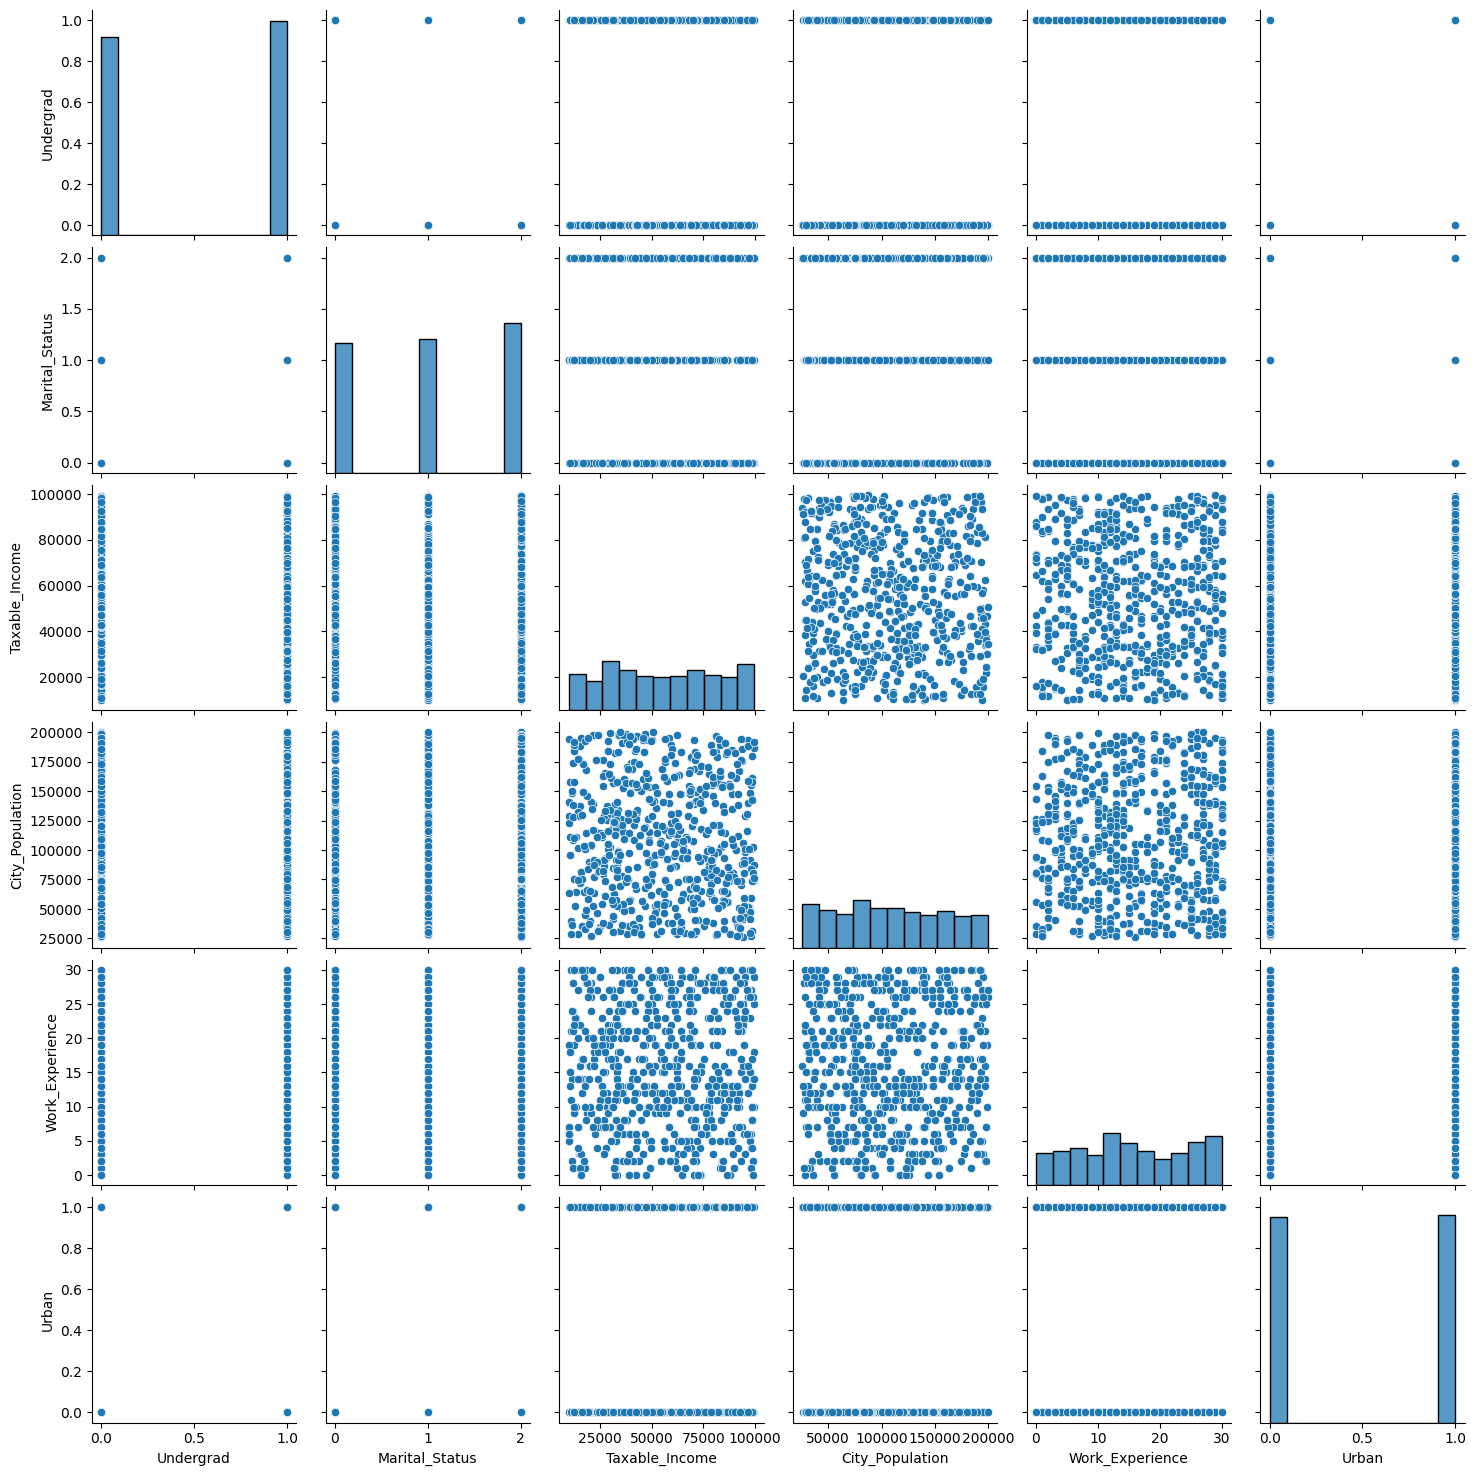

In [23]:
plt.figure(figsize=(8,8))
sns.pairplot(fr, palette='coolwarm')
plt.show()

<Axes: >

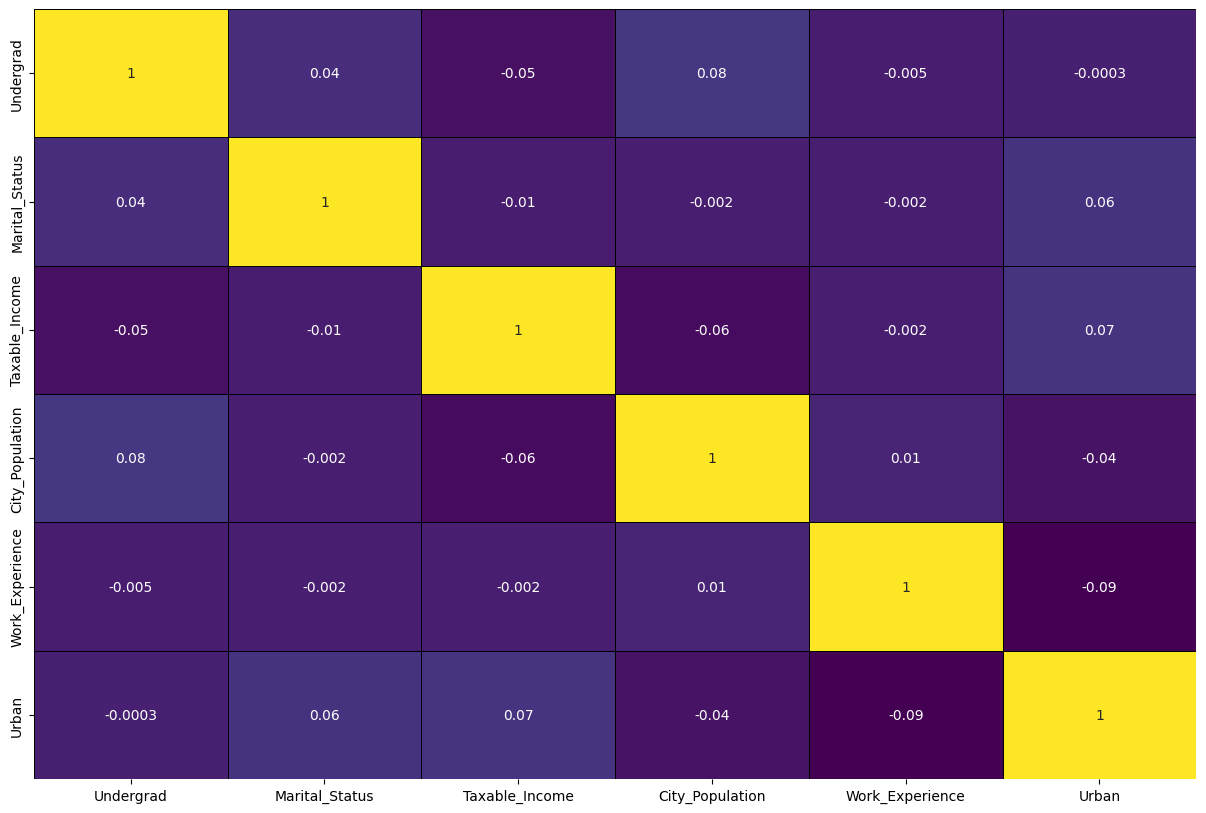

In [30]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(fr.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

# Decision Tree

In [25]:
x = pd.concat([fr.iloc[:,[0,1]],fr.iloc[:,3:]], axis = 'columns')
y =  fr.Taxable_Income

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

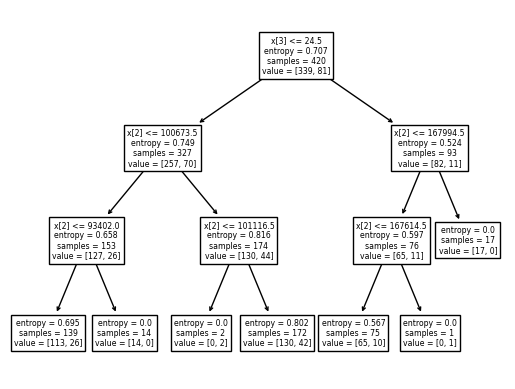

In [29]:
from sklearn import tree
tree.plot_tree(model);

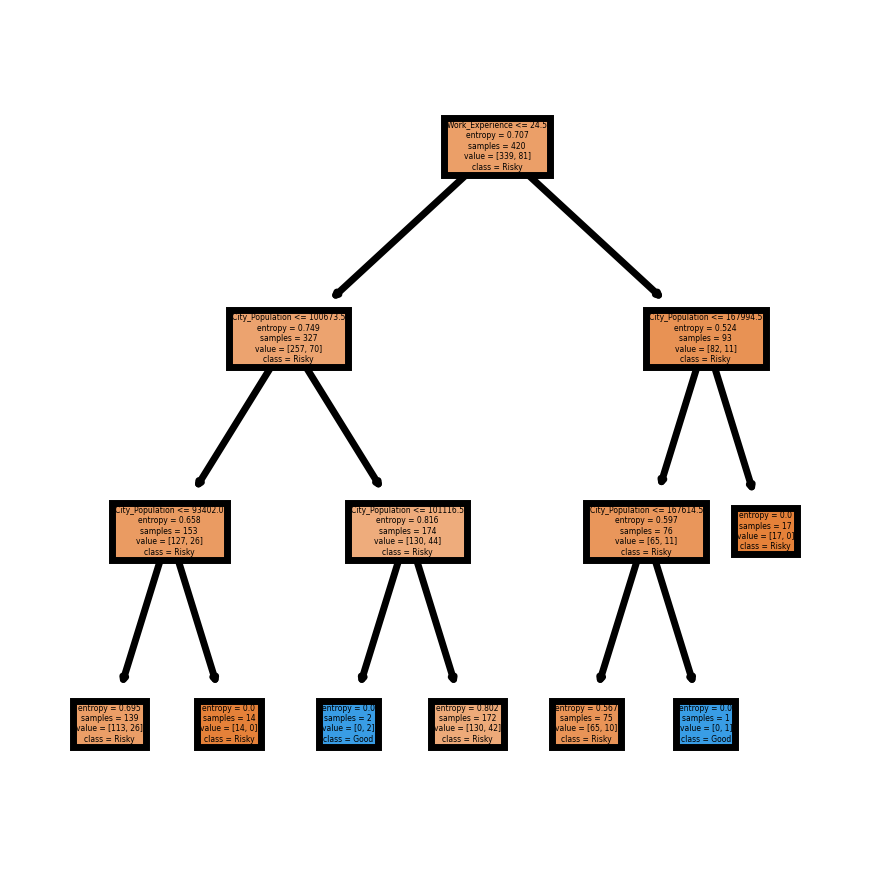

In [31]:
fn = ['Undergrad', 'Marital_Status','City_Population',
       'Work_Experience', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (2,2), dpi = 500)
tree.plot_tree(model, feature_names= fn, class_names = cn, filled = True);

In [32]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [34]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred)
con_mat

array([[137,   0],
       [ 43,   0]])

In [35]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
acc

0.7611111111111111

# Using gini

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)


In [46]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='gini', max_depth=2)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

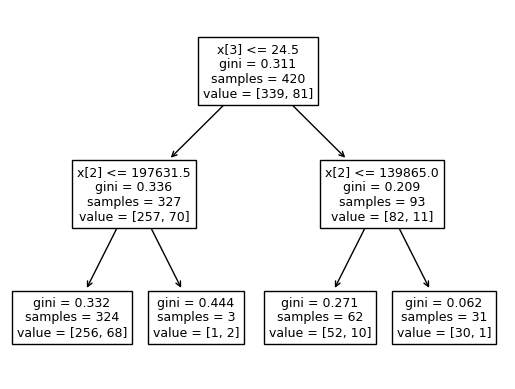

In [47]:
from sklearn import tree
tree.plot_tree(model1);

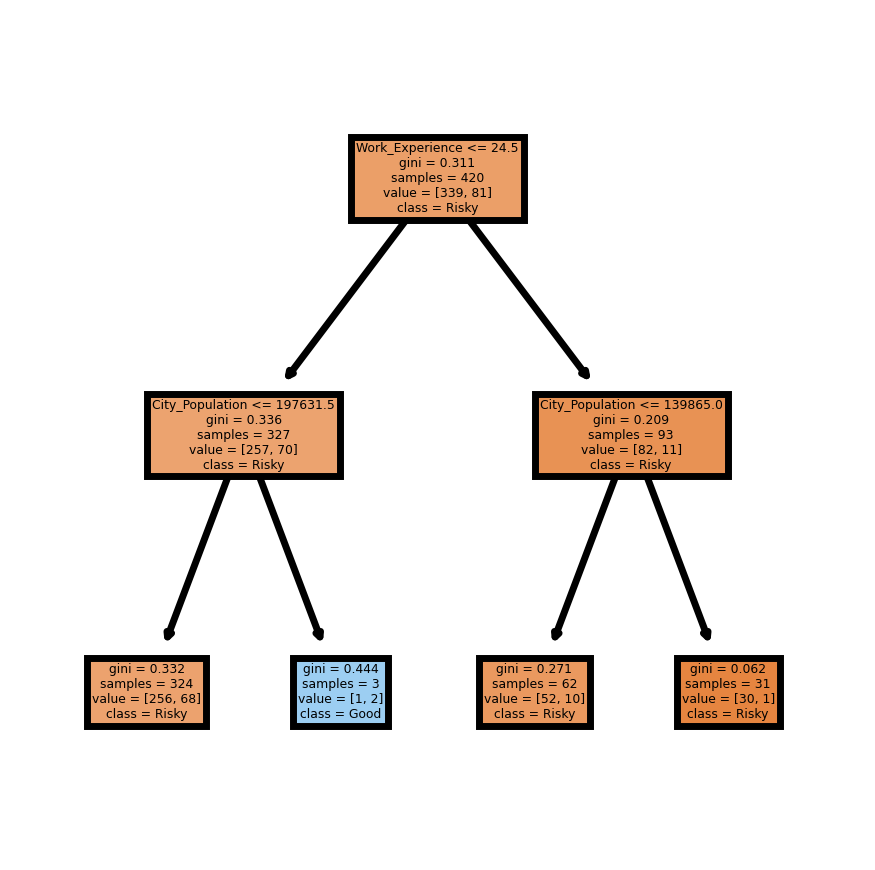

In [48]:
fn = ['Undergrad', 'Marital_Status','City_Population',
       'Work_Experience', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (2,2), dpi = 500)
tree.plot_tree(model1, feature_names= fn, class_names = cn, filled = True);

In [49]:
pred2 = model1.predict(X_test)
pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [50]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, pred)
con_mat

array([[137,   0],
       [ 43,   0]])

In [51]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
acc

0.7611111111111111

# Validation

kfold

In [53]:
X = fr.iloc[:,:-1]
y = fr.Taxable_Income

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10)
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=3)

result1 = cross_val_score(model1, X, y, cv=kfold)
result1.mean()

0.9983333333333334

LooCV

In [54]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()

model2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
result2 = cross_val_score(model2, X, y, cv=loocv)

print(result2.mean())

0.9983333333333333
